In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('top5_leagues_data.csv')

In [3]:
df.head()

,Pts/MP,Gls,GA,Ast,Sh/90,Dist,PKatt,Cmp,Cmp%,PrgDist,Att 3rd,TotDist,Tkl+Int,Err,Save%,Fls,Won%
0,2.63,2.710526,0.710526,2.236842,17.26,17.8,0.210526,688.526316,87.3,3349.394737,255.763158,3081.552632,23.921053,0.500000,68.2,9.052632,55.1
1,2.13,1.763158,0.736842,1.394737,13.39,18.4,0.078947,467.500000,81.2,2684.815789,187.026316,2103.131579,27.500000,0.526316,81.1,10.657895,55.6
2,2.03,1.842105,0.947368,1.342105,16.32,18.4,0.078947,507.473684,81.4,3327.421053,196.473684,2125.184211,26.263158,0.578947,72.6,10.105263,50.9
3,1.97,2.157895,1.000000,1.526316,16.71,17.7,0.078947,535.973684,81.8,3303.157895,191.868421,2338.763158,26.736842,0.315789,67.3,9.052632,47.4
4,1.84,1.578947,1.000000,1.105263,15.87,17.9,0.078947,499.131579,82.1,2936.263158,193.000000,2473.394737,27.894737,0.631579,69.2,9.552632,54.3


In [4]:
df.describe()

,Pts/MP,Gls,GA,Ast,Sh/90,Dist,PKatt,Cmp,Cmp%,PrgDist,Att 3rd,TotDist,Tkl+Int,Err,Save%,Fls,Won%
count,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000
mean,1.374320,1.345717,1.387374,0.935136,12.324541,18.039626,0.163775,387.128611,77.720238,2553.817515,140.423017,1820.024565,27.046847,0.344217,70.525340,12.452441,50.103571
std,0.453242,0.446774,0.351154,0.352646,2.139445,1.063861,0.077591,89.819501,4.872656,300.509473,30.324027,393.979703,2.919430,0.134721,4.792877,1.750925,3.197679
min,0.420000,0.500000,0.526316,0.315789,6.970000,15.100000,0.000000,188.684211,60.700000,1761.605263,91.710526,1036.973684,18.263158,0.026316,52.700000,8.289474,41.100000
25%,1.050000,1.026316,1.131579,0.684211,10.855000,17.300000,0.105263,325.986842,74.675000,2343.480263,119.184680,1538.379257,24.857198,0.236842,67.300000,11.210526,47.800000
50%,1.320000,1.263158,1.375387,0.868421,11.960000,18.000000,0.157895,367.171053,77.800000,2506.907895,133.039474,1758.315789,26.986842,0.323529,70.600000,12.527864,50.100000
75%,1.660000,1.581269,1.605263,1.117647,13.450000,18.800000,0.210526,433.888158,81.000000,2744.642415,153.659443,2043.572368,28.953947,0.441176,73.700000,13.581269,52.200000
max,2.630000,2.882353,2.529412,2.236842,19.650000,20.900000,0.526316,688.526316,89.500000,3881.147059,262.236842,3396.657895,37.631579,0.868421,83.700000,18.578947,59.500000


<Axes: >

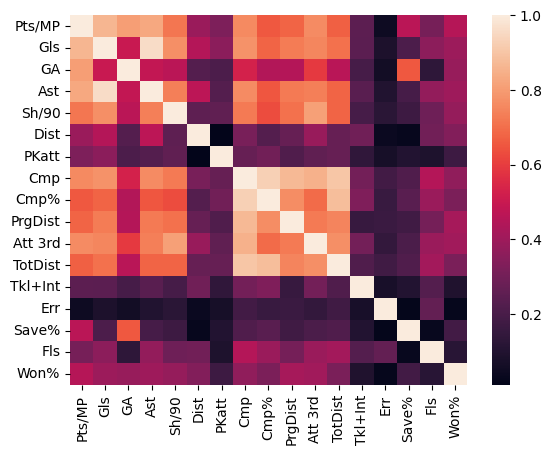

In [5]:
sns.heatmap(df.corr().abs())

In [18]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
X = df.drop(columns=['Pts/MP']).to_numpy()
y = df['Pts/MP'].to_numpy()
y = y.reshape((y.size, 1))

X.shape, y.shape

((588, 16), (588, 1))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
X_train_scaled = np.c_[np.ones(X_train.shape[0]), X_train_scaled]
X_test_scaled = np.c_[np.ones(X_test.shape[0]), X_test_scaled]

In [11]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
#

LinearRegression()

In [12]:
y_pred = model.predict(X_test_scaled)

In [13]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R_2 Score: {r2}')

MSE: 0.01304655304474443
R_2 Score: 0.9407037268951671


### Decision Tree

In [14]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [15]:
y_pred_dt = dt_model.predict(X_test)

In [16]:
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'Decision Tree - Mean Squared Error: {mse_dt}')
print(f'Decision Tree - R-squared Score: {r2_dt}')

Decision Tree - Mean Squared Error: 0.04047796610169493
Decision Tree - R-squared Score: 0.8160286073675879


### Random Forest

In [20]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train.reshape(y_train.size))

RandomForestRegressor(random_state=42)

In [21]:
y_pred_rf = rf_model.predict(X_test)

In [22]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - Mean Squared Error: {mse_rf}')
print(f'Random Forest - R-squared Score: {r2_rf}')

Random Forest - Mean Squared Error: 0.01526649127118643
Random Forest - R-squared Score: 0.9306141604863608


##### Little test

In [35]:
current_prem_df = pd.read_csv('epl_07_03.csv')

In [36]:
X_curr = current_prem_df.drop(columns=['Pts/MP']).to_numpy()
y_curr = current_prem_df['Pts/MP'].to_numpy()

X_curr.shape, y_curr.shape

((20, 16), (20,))

In [45]:
X_curr_scaled = scaler.transform(X_curr)
X_curr_scaled = np.c_[np.ones(X_curr.shape[0]), X_curr_scaled]

In [46]:
lr_pred = model.predict(X_curr_scaled)
rf_pred = rf_model.predict(X_curr)
dt_pred = dt_model.predict(X_curr)


In [50]:
names = pd.read_html('https://fbref.com/en/comps/9/Premier-League-Stats')[0][['Squad', 'Pts', 'Pts/MP']]
names['current_pace_pts'] = names['Pts/MP'] * 38
names = names.drop(['Pts/MP', 'Pts'], axis=1)
names['lr'] = lr_pred * 38
names['dt'] = dt_pred * 38
names['rf'] = rf_pred * 38
names

,Squad,current_pace_pts,lr,dt,rf
0,Liverpool,88.54,84.633627,87.02,85.3518
1,Manchester City,87.40,83.864030,77.14,79.8190
2,Arsenal,85.88,89.622431,95.76,87.6546
3,Aston Villa,77.52,67.603813,57.00,66.5038
4,Tottenham,72.96,65.143095,71.44,65.5728
5,Manchester Utd,61.94,52.563144,47.88,51.8966
6,West Ham,59.28,49.130290,44.08,49.3316
7,Newcastle Utd,56.24,64.094849,57.00,58.8012
8,Brighton,54.72,57.661359,60.04,57.3952
9,Wolves,53.58,49.958946,41.04,47.0782


In [77]:
for i in range(1, len(df.columns)):
    print(df.columns[i], ':', model.coef_[0, i])

Gls : 0.2791490935209055
GA : -0.20928044147393007
Ast : -0.024775959541158202
Sh/90 : 0.014335845315756445
Dist : -0.004755216738798018
PKatt : 0.0015505028889951813
Cmp : 0.0844732948617632
Cmp% : -0.016809055056982398
PrgDist : -0.032699528434339445
Att 3rd : -0.011770106792146354
TotDist : -0.022460766497089748
Tkl+Int : 0.008979421895262718
Err : 0.005293955767686795
Save% : 0.012222569479116666
Fls : -0.0016390708140334434
Won% : 0.01439600602168365


In [78]:
for i in range(1, len(df.columns)):
    print(df.columns[i], ':', dt_model.feature_importances_[i-1])

Gls : 0.6692235765362277
GA : 0.26969493975368514
Ast : 0.008463116696886633
Sh/90 : 0.006068706697891512
Dist : 0.004492999625731352
PKatt : 0.005781471901893816
Cmp : 0.001738103698955435
Cmp% : 0.0038795291485025606
PrgDist : 0.004164438407878664
Att 3rd : 0.002333124921806646
TotDist : 0.0021578754009793765
Tkl+Int : 0.004555005589353777
Err : 0.0005644149530340387
Save% : 0.0035504550709000104
Fls : 0.006304474323184263
Won% : 0.00702776727308934


In [79]:
for i in range(1, len(df.columns)):
    print(df.columns[i], ':', rf_model.feature_importances_[i-1])

Gls : 0.629650114469411
GA : 0.2614431825793231
Ast : 0.026293386859261438
Sh/90 : 0.00641337204639827
Dist : 0.004496922284463666
PKatt : 0.004065410423815964
Cmp : 0.009403423610309469
Cmp% : 0.007010635732019912
PrgDist : 0.0034346903429385137
Att 3rd : 0.018571512819191744
TotDist : 0.0044974584512231346
Tkl+Int : 0.004456755657211456
Err : 0.003633656551963661
Save% : 0.005837095506033577
Fls : 0.005827946329355271
Won% : 0.0049644363370798415
